In [4]:
import pandas as pd


In [5]:
df = pd.read_csv("Almond.csv")
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [6]:
df.describe()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,1401.000000,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,809.300727,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,0.000000,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,700.500000,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,1401.000000,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,2101.500000,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,2802.000000,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [9]:
# Analyzing missing data
missing_data = df.isnull().sum()
missing_data

Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [11]:
from sklearn.impute import KNNImputer

# Inisialisasi KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Mengimputasi nilai yang hilang
imputed_dataset = pd.DataFrame(knn_imputer.fit_transform(df.drop(columns=['Unnamed: 0', 'Type'])), 
                               columns=df.columns.drop(['Unnamed: 0', 'Type']))

# Menggabungkan kembali kolom 'Type' dan 'Unnamed: 0'
imputed_dataset['Type'] = df['Type']
imputed_dataset['Unnamed: 0'] = df['Unnamed: 0']

# Menampilkan beberapa baris setelah imputasi
imputed_dataset.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type,Unnamed: 0
0,224.441415,227.940628,127.759132,22619.0,643.813269,0.577930,0.973384,1.458265,1.693753,0.802202,0.681193,23237.5,MAMRA,0
1,280.221072,234.188126,128.199509,23038.0,680.984841,0.396077,0.957304,1.601844,1.756248,0.818409,0.656353,24065.5,MAMRA,1
2,260.352371,229.418610,125.796547,22386.5,646.943212,0.428266,0.967270,1.487772,1.706565,0.807782,0.683620,23144.0,MAMRA,2
3,238.870776,232.763153,125.918808,22578.5,661.227483,0.516699,0.965512,1.540979,1.767467,0.821427,0.685360,23385.0,MAMRA,3
4,249.576428,230.150742,107.253448,19068.0,624.842706,0.400679,0.951450,1.629395,1.751704,0.817670,0.714800,20041.0,MAMRA,4


In [12]:
missing_data = imputed_dataset.isnull().sum()
missing_data

Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
Unnamed: 0                  0
dtype: int64

In [15]:
df_cleaned = imputed_dataset
df_cleaned

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type,Unnamed: 0
0,224.441415,227.940628,127.759132,22619.0,643.813269,0.577930,0.973384,1.458265,1.693753,0.802202,0.681193,23237.5,MAMRA,0
1,280.221072,234.188126,128.199509,23038.0,680.984841,0.396077,0.957304,1.601844,1.756248,0.818409,0.656353,24065.5,MAMRA,1
2,260.352371,229.418610,125.796547,22386.5,646.943212,0.428266,0.967270,1.487772,1.706565,0.807782,0.683620,23144.0,MAMRA,2
3,238.870776,232.763153,125.918808,22578.5,661.227483,0.516699,0.965512,1.540979,1.767467,0.821427,0.685360,23385.0,MAMRA,3
4,249.576428,230.150742,107.253448,19068.0,624.842706,0.400679,0.951450,1.629395,1.751704,0.817670,0.714800,20041.0,MAMRA,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,249.863498,192.709366,122.356506,18471.5,653.345233,0.380973,0.931000,1.838965,1.733048,0.815298,0.725739,19840.5,SANORA,2798
2799,229.564294,186.254745,118.708961,17213.5,581.688379,0.430610,0.952706,1.564234,1.593657,0.778440,0.714016,18068.0,SANORA,2799
2800,245.207129,186.196182,119.147224,17510.5,608.315795,0.371691,0.948821,1.681705,1.593657,0.778440,0.718999,18455.0,SANORA,2800
2801,243.962350,188.660828,120.634438,17941.0,630.759446,0.388824,0.944810,1.764701,1.810389,0.833295,0.738191,18989.0,SANORA,2801


In [16]:
df_cleaned.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Unnamed: 0
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,269.155884,168.896231,119.143655,26511.117374,743.863770,0.451427,0.955828,1.825233,1.805600,0.822247,0.724587,27696.218159,1401.000000
std,63.836021,26.832659,22.433819,13782.561344,230.632076,0.107559,0.039596,0.794058,0.206194,0.039769,0.047474,14237.347610,809.300727
min,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000,0.000000
25%,222.717072,150.171442,104.393578,16211.500000,571.730009,0.377227,0.944579,1.357398,1.652635,0.793866,0.701673,17088.500000,700.500000
50%,258.157410,166.970779,118.007500,23440.500000,707.487369,0.436079,0.970422,1.576412,1.745610,0.815573,0.733720,24589.000000,1401.000000
75%,300.951799,185.893585,134.198933,33451.000000,878.896530,0.541079,0.981484,1.965953,1.974712,0.858722,0.757551,34863.250000,2101.500000
max,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000,2802.000000


In [17]:
df_cleaned.isnull().sum()

Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
Unnamed: 0                  0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

X = df_cleaned.drop(columns=['Type', 'Unnamed: 0'])
y = df_cleaned['Type']

X.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
0,224.441415,227.940628,127.759132,22619.0,643.813269,0.577930,0.973384,1.458265,1.693753,0.802202,0.681193,23237.5
1,280.221072,234.188126,128.199509,23038.0,680.984841,0.396077,0.957304,1.601844,1.756248,0.818409,0.656353,24065.5
2,260.352371,229.418610,125.796547,22386.5,646.943212,0.428266,0.967270,1.487772,1.706565,0.807782,0.683620,23144.0
3,238.870776,232.763153,125.918808,22578.5,661.227483,0.516699,0.965512,1.540979,1.767467,0.821427,0.685360,23385.0
4,249.576428,230.150742,107.253448,19068.0,624.842706,0.400679,0.951450,1.629395,1.751704,0.817670,0.714800,20041.0


In [35]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Normalizing the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[ 1.88216776, -0.29211873,  1.19679893, ...,  2.22423166,
         2.04769417,  1.14220238],
       [-0.12498524,  0.5559005 , -1.37160487, ...,  1.52035615,
        -3.3297782 , -0.63383995],
       [-0.54556079, -1.60913469, -0.54290185, ...,  0.54108882,
         0.31611768, -0.26700595],
       ...,
       [-0.6274213 ,  1.01970567, -1.05867602, ...,  1.04753983,
        -1.10163464, -0.84580454],
       [-1.31094885,  0.26324757, -1.97212391, ...,  1.34636692,
        -0.66941707, -1.17770688],
       [ 0.34934267, -1.04272348, -0.2336258 , ..., -0.42002693,
         1.00445493, -0.08880289]])

In [38]:
import numpy as np
max_k = min(40, len(X_train) // 2)  # to avoid using too large k
k_values = range(1, max_k, 2)

In [39]:
# Empty list to hold error rates
error_rates = []

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [41]:
# Loop over k_values to find the optimal k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

C:\Users\mulya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mulya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

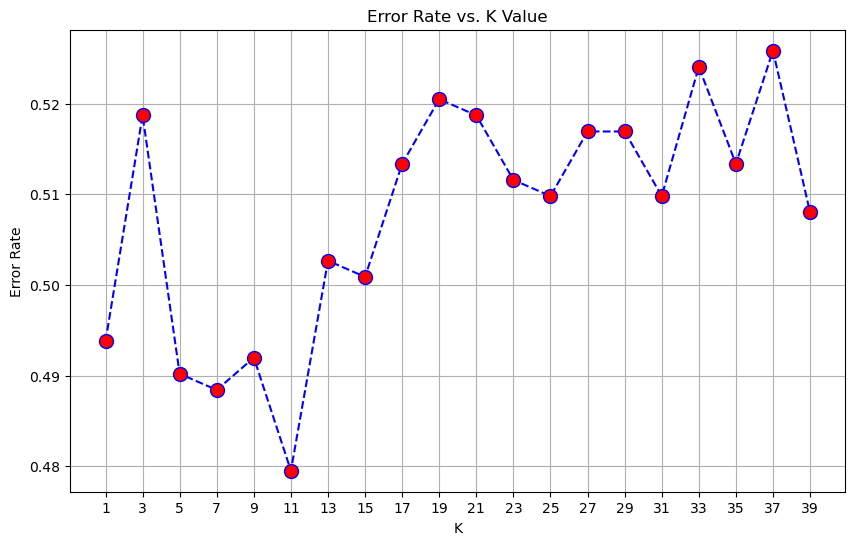

In [43]:
# Plotting the error rate vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [42]:
# Find the k value with the lowest error rate
optimal_k = k_values[error_rates.index(min(error_rates))]
optimal_k, min(error_rates)

(11, 0.47950089126559714)

In [51]:
# inisiasi dan melakukan training model
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [52]:
y_pred = knn.predict(X_test_scaled)

C:\Users\mulya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

In [54]:
accuracy

0.7308377896613191

In [56]:
print(classification_report_result)

              precision    recall  f1-score   support

       MAMRA       0.88      0.77      0.82       189
     REGULAR       0.65      0.71      0.68       187
      SANORA       0.69      0.72      0.70       185

    accuracy                           0.73       561
   macro avg       0.74      0.73      0.73       561
weighted avg       0.74      0.73      0.73       561

